<!DOCTYPE html>
<html>
<head>
<style>
* {
  box-sizing: border-box;
}

.row {
  margin-left:-5px;
  margin-right:-5px;
}
  
.column {
  float: left;
  width: 50%;
  padding: 5px;
}

/* Clearfix (clear floats) */
.row::after {
  content: "";
  clear: both;
  display: table;
}

table {
  border-collapse: collapse;
  border-spacing: 0;
  width: 100%;
  border: 1px solid #ddd;
}

th, td {
  text-align: left;
  padding: 16px;
}

tr:nth-child(even) {
  background-color: #f2f2f2;
}
</style>
</head>
<body>

<h2 style="text-align: center" >BBM409 : Introduction to Machine Learning Lab.</h2>
<h4 style="text-align: center">Assignment 2 :  Decision Tree Algorithm.</h4>
<br>
<div class="row">
  <div class="column">
    <table>
      <tr>
        <th>First Name</th>
        <th>Last Name</th>
        <th>No</th>
      </tr>
      <tr>
        <td>Esad </td>
        <td>Boran</td>
        <td>21827206</td>
      </tr>
      <tr>
        <td>Evren</td>
        <td>Çağılcı</td>
        <td>21945977</td>
      </tr>
    </table>
  </div>
</div>

</body>
</html>

## Introduction
In this assignment, we used the Decision Tree model using the ID3 algorithm. A decision tree is a particular kind of flow chart that is used to illustrate the decision-making process by outlining potential actions. 

A decision tree is, to put it simply, a dataset-based structure with nodes (attributes) and branches. Each node either represents an outcome or is utilized to make a decision (decision node) (leaf node). In order to generate the tree, we employed the ID3 algorithm. The algorithm known as  splits features into at least two groups

# 2. Background

## 2.1  Classification Performance Metric

"Accuracy", "Precision", "Recall" and "F1 Score" are calculated to test the model's success.


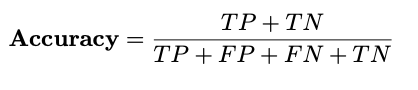
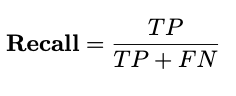
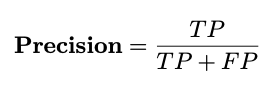
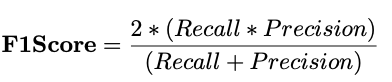

## 2.2  ID3 algorithm

<b>What is an ID3 Algorithm?<b>
ID3 stands for Iterative Dichotomiser 3

It is a classification algorithm that follows a greedy approach by selecting a best attribute that yields maximum Information Gain(IG) or minimum Entropy(H).
    
<b>What is Entropy and Information gain?<b>
    
Entropy is a measure of the amount of uncertainty in the dataset S. Mathematical Representation of Entropy is shown here

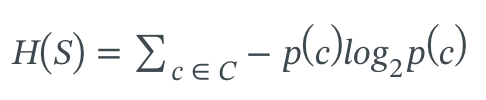

Information Gain IG(A) tells us how much uncertainty in S was reduced after splitting set S on attribute A. Mathematical representation of Information gain is shown here

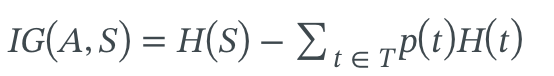

## 3.Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
from DecisionTreeClass import *
from cross_val import *
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score

# 4 Assignment Solution

## 4.1 Data preprocessing and separation

In [2]:
# We read data here with pandas
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# We changed the data for properties with a very different number of values
for x in data.columns:
    if len(data[x].value_counts()) > 5:
        if type(data[x][0])==np.int64:
            data[x] = pd.cut(data[x],3, labels=["Small","Medium","Large"])

In [4]:
X = data.drop(["Attrition"], axis=1)
y = data["Attrition"]

## 4.2 Part 1: Employee Attrition Prediction Without Pruning

In [5]:
# We created our Decision Tree Model
model = DecisionTreeClassifier()
part1 = cross_validation(model, X, y, "Attrition", False) # We trained the model 5 times and put the results into the dataframe.
part1

,0,1,2,3,4
Accuracy,0.721088,0.768707,0.789116,0.823129,0.782313
Recall,0.840637,0.897119,0.942857,0.967742,0.918699
Precision,0.833992,0.835249,0.827957,0.845070,0.837037
F1_score,0.837302,0.865079,0.881679,0.902256,0.875969


## 4.3 Part 2: Employee Attrition Prediction With Pruning

In [6]:
model2 = DecisionTreeClassifier()
part2 = cross_validation(model, X, y, "Attrition", True)  # We trained the model 5 times and put the results into the dataframe.
part2

,0,1,2,3,4
Accuracy,0.693878,0.714286,0.792517,0.748299,0.778912
Recall,0.785992,0.879828,0.909091,0.886179,0.926230
Precision,0.852321,0.785441,0.858209,0.825758,0.827839
F1_score,0.817814,0.829960,0.882917,0.854902,0.874275


# 5 Error Analysis

We have gathered these features under 3 different results in order to classify features that have many different results more easily. As a result of this process, the error rate of the tree increased.

Assigning a No value for each train data in our test set that we did not encounter increased the error rate and decreased the accuracy value.

After we applied pruning to our tree, accuracy rate downgraded because after this process, tree didn't check last leafs and generalized the result according to father.

Recall and precision ratios are higher than accuracy ratio because there are too much "No" values in our given dataset.

Our error turned out to be bigger due to unnecessary data sets in the data.

# 6 Conclusion

In this assignment, we learnt to generate Decision trees according to ID3 algorithm. In Part 2, we learned to apply pruning process to tree. We saw that if data is given more organised(balanced), tree might work better and accuracy ratio might be higher.

# 7.References

<ul>
  <li>https://medium.com/geekculture/step-by-step-decision-tree-id3-algorithm-from-scratch-in-python-no-fancy-library-4822bbfdd88f</li>
  <li>https://iq.opengenus.org/id3-algorithm/</li>
  <li>https://stackoverflow.com</li>
  <li>BBM406 Lecture Notes</li>
  <li>https://towardsdatascience.com/id3-decision-tree-classifier-from-scratch-in-python-b38ef145fd90</li>
  <li> https://digitalmind.io/post/train-test-split-and-cross-validation</li>
</ul>